
                                             Factors that infulence making money
                                             
I will investigate a few facts using the dataset downloaded from  UCI Machine Learning Repository in the following
link:
https://archive.ics.uci.edu/ml/datasets/adult

The dataset comes with factors (predictor variables) that help an individual to become rich (response variable). 
After wrangling, the dataset has 30,161 rows with fourteen features. This is a labelled dataset with a response 
variable rich. A person is rich if he or she makes more than $50,000 otherwise the person is not rich.



# Read the data

Rename some of the columns' name and delete the column that provides information about the sample time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


#help(pd.read_csv)
df=pd.read_csv(r"C:\users\musht\input\\adult.csv",sep='\s*,\s*',header=0, encoding='ascii', engine='python')

# Let's change the name of the few columns to make them more interesting and intuitive.
df=df.rename({'39':'age'}, axis=1)
df=df.rename({'State-gov':'work_class'}, axis=1)
df=df.rename({'13':'yrs_edu'}, axis=1)
df=df.rename({'Never-married':'marital_stat'}, axis=1)
df=df.rename({'Bachelors':'edu_level'},axis=1)
df=df.rename({'Adm-clerical':'occupation'},axis=1)
df=df.rename({'White':'race'},axis=1)
df=df.rename({'Male':'gender'},axis=1)
df=df.rename({'2174':'capital_gain'},axis=1)
df=df.rename({'0':'capital_loss'},axis=1)
df=df.rename({'40':'hrs_week'},axis=1)
df=df.rename({'United-States':'native_country'},axis=1)
df=df.rename({'Not-in-family':'family_stat'},axis=1)
df=df.rename({'<=50K':'target'},axis=1)
del df['77516']# sample type information is deleted
df.head()
cc=list(df.columns)
print (cc)

['age', 'work_class', 'edu_level', 'yrs_edu', 'marital_stat', 'occupation', 'family_stat', 'race', 'gender', 'capital_gain', 'capital_loss', 'hrs_week', 'native_country', 'target']


In [2]:
# Are there missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
age               32560 non-null int64
work_class        32560 non-null object
edu_level         32560 non-null object
yrs_edu           32560 non-null int64
marital_stat      32560 non-null object
occupation        32560 non-null object
family_stat       32560 non-null object
race              32560 non-null object
gender            32560 non-null object
capital_gain      32560 non-null int64
capital_loss      32560 non-null int64
hrs_week          32560 non-null int64
native_country    32560 non-null object
target            32560 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


Find the missing columns and delete them as all of the missing values fall in the same intances for three different columns

In [3]:
# Let's take care of the missing values
# Delete the missing values as all missing are in three columns of the same row
import numpy as np
df['work_class'].replace('?',np.nan,inplace=True)
df['occupation'].replace('?',np.nan,inplace=True)
df['native_country'].replace('?',np.nan,inplace=True)
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

age               0
work_class        0
edu_level         0
yrs_edu           0
marital_stat      0
occupation        0
family_stat       0
race              0
gender            0
capital_gain      0
capital_loss      0
hrs_week          0
native_country    0
target            0
dtype: int64

In [4]:
df.shape

(30161, 14)

# We will prepare the data for the exploration analysis first and then later in this book we will prepare the final data to run the algorithm.

Investigation I
Do males make more money than their female counterparts? It is a well-established fact that a male makes more
money than his female-counterpart with same education level, experience and job title/position.
I will explore this fact in my analysis.

Investigation II
Do never-married  individuals make more money than others? It is interesting to see whether a family helps or not.
For an appropriate analysis we will include only participants above age 35.

Investigation III
Does higher education help to make more money? Obviously, it does. I will explore this issue in my analysis.

Investigaion IV
Does the higher income group have more percetage of holding stock? That seems to the case.


Investigation I: Do males make more money than their famle-counterparts with same education and job positions
We will target those individulas with eductional achievement bachelor degree and above and same job titles: Exec-managerial and 
Prof-specialty. 

In [5]:
# pull out data for Investigation I. Combine backgrounds education levels and occupation

get_ed=df[(df['edu_level']=='Bachelors')|(df['edu_level']=='Masters')|(df['edu_level']=='Doctorate')|(df['edu_level']=='Prof-school')]
data1=get_ed[(get_ed['occupation']=='Exec-managerial')|(get_ed['occupation']=='Prof-specialty')]
count_data1=data1.groupby(['gender','target'])['target'].count()
print ("Table 1: Showing counts of data based on gender and amount of money\n ",count_data1)

Table 1: Showing counts of data based on gender and amount of money
  gender  target
Female  <=50K     1013
        >50K       474
Male    <=50K     1189
        >50K      2275
Name: target, dtype: int64


In [6]:
#write a function that will return percent of a binary catagorical variables and the target variable rich or not.
# we can use this function frequently in this analysis

def find_percent(frame, col1,col2): # col1 and col2 should be binary catagorical variables
    capture=frame.groupby([col1,col2])[col1].count().to_dict()
    listthem=[]
    for key, value in capture.items():
        temp=key
        first=temp[0]
        second=temp[1]
        listtemp=[]
        listtemp.append(first)
        listtemp.append(second)
        listtemp.append(value)
        listthem.append(listtemp)
        listtemp=[]
    col1_first=listthem[0][2]+listthem[1][2]
    col1_first_pecent_over50K=listthem[1][2]/col1_first*100
    col1_second=listthem[2][2]+listthem[3][2]
    col1_second_pecent_over50K=listthem[3][2]/col1_second*100
    x=[listthem[0][0],listthem[2][0]]

    y=[col1_first_pecent_over50K,col1_second_pecent_over50K]
    return x,y


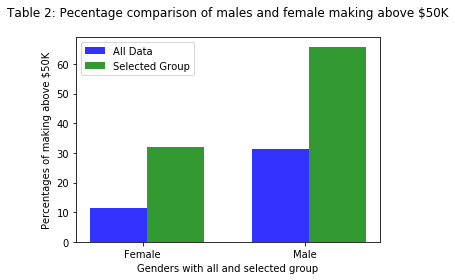

In [7]:
# visual display of Investigation I
# invoke the function on data1: male and female with same two occupations and higher level education: 
#Bachelor and above. We will look at two groups: all persons and selected persons as mentioned above

import numpy as np
import matplotlib.pyplot as plt

# pull the data again

allx,ally=find_percent(df,'gender','target')# all data
selectedx, selectedy=find_percent(data1,'gender','target')# selected data

plt.show()
# create plot
index = np.arange(2)
fig, ax = plt.subplots()
#index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

alldata = plt.bar(allx, ally, bar_width,
alpha=opacity,
color='b',
label='All Data')

selected = plt.bar(index + bar_width, selectedy, bar_width,
alpha=opacity,
color='g',
label='Selected Group')
plt.xlabel('Genders with all and selected group')
plt.ylabel('Percentages of making above $50K')
plt.title('Table 2: Pecentage comparison of males and female making above $50K\n')
plt.xticks(index + bar_width-.2, ('Female','Male'))
plt.legend()
plt.tight_layout()
plt.show()


Conclusion to Analysis I: The data suggests the established fact that male makes more than his female counterpart
with similar background. Our anaysis shows that only 32% females make above $50,000 whereas 63% of their
counterparts make above $50,000 when considering a selected group with similar college education and special job titles.The gap is higher (11% to 34%) when we consider the wohole population.

 Do never-married are richer than other matrital groups? We consider only persons older than 35.

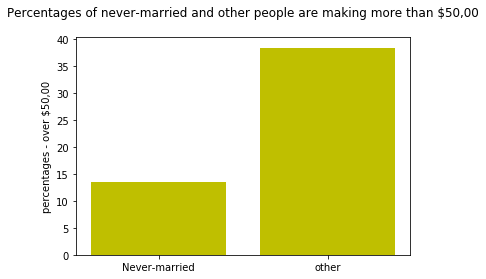

change_marital  target
Never-married   <=50K     1591
                >50K       250
other           <=50K     8975
                >50K      5607
Name: target, dtype: int64

In [8]:
#Investigation I - pull data now
married_data=df.copy()
married_data['change_marital']=df['marital_stat'].apply(lambda x: 'other' if x!='Never-married' else x)
married_data=married_data[married_data['age']>35]
married_data['change_marital'].value_counts()
x,y=find_percent(married_data, 'change_marital','target')
plt.bar(x,y, color='y')
plt.ylabel('percentages - over $50,00')
plt.title('Percentages of never-married and other people are making more than $50,00\n')

plt.show()

married_data.groupby(['change_marital','target'])['target'].count()

Conclusion to Investigation II: Less than 14% of never-married individuals as compared 39% of others make more 
than $50,00. A hypothesis could be investigated further that being married helps to become rich.

In [9]:
#Investigation III
# Is there any relationship between higher education and being rich

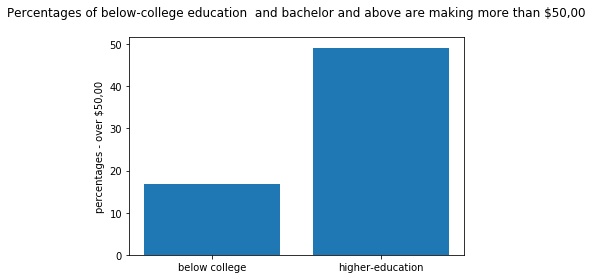

change_education  change_target
below college     not-rich         18796
                  rich              3778
higher-education  not-rich          3857
                  rich              3730
Name: change_target, dtype: int64

In [10]:
#Investigation III - pull the data
data3=df.copy()
data3['change_education']=data3['edu_level'].apply(lambda x: 'higher-education' if x=='Bachelors' or x=='Masters' or x=='Doctorate' or x=='Prof-school' else 'below college')
data3['change_target']=data3['target'].apply(lambda x: 'rich' if x=='>50K' else 'not-rich')
x,y =find_percent(data3,'change_education','change_target')
plt.bar(x,y)
plt.ylabel('percentages - over $50,00')
plt.title('Percentages of below-college education  and bachelor and above are making more than $50,00\n')
plt.show()

data3.groupby(['change_education','change_target'])['change_target'].count()


Conclusion to Investigation III: This just establishes the fact that higher education helps to make more money.
Our result indicates that only 18% of below-college educated individuals as compared to 49% of college and above educated individuals make more than $50,000


Does the higher income group have more percetage of holding stock? That seems to the case.

In [12]:
#Investigation IV - pull the data now
data4=df.copy()

data4['data_stock']=(data4['capital_gain']>0)| (data4['capital_loss']>0)
data4['stock_info']=data4['data_stock'].apply(lambda x: "no_stock" if x==False else 'has_stock')
data4.groupby(['target','stock_info'])['stock_info'].count()

target  stock_info
<=50K   has_stock      1632
        no_stock      21021
>50K    has_stock      2332
        no_stock       5176
Name: stock_info, dtype: int64

In [13]:
# this set not used
total_persons=len(data4.index)
total_stock_holders=data4['stock_info'].value_counts()
total_stock_holders=3964
data4['target'].value_counts()
total_more_50K=7508
first_set=[100, 7508/30161*100,22653/30161*100]
first_set
second_set=[3964/30161*100,2332/3964*100,1632/3964*100]
second_set

print ("first_set ",first_set,"\nsecond_set ", second_set)


first_set  [100, 24.89307383707437, 75.10692616292563] 
second_set  [13.142800305029676, 58.82946518668012, 41.17053481331988]


In [ ]:
#this set was used not the one above
first_set=[30161,7508,22653]
second_set=[3964,2332,1632]
print ("first_set ",first_set,"\nsecond_set ", second_set)


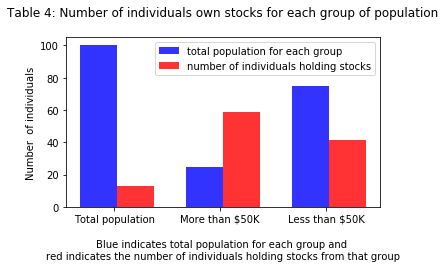

In [14]:
# create plot
import matplotlib as mpl
index = np.arange(3)
fig, ax = plt.subplots()
#index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

fake=['A','B','C']
first = plt.bar(fake, first_set, bar_width,
alpha=opacity,
color='b',
label='total population for each group')

second = plt.bar(index + bar_width, second_set, bar_width, alpha=opacity,color='r',label='number of individuals holding stocks')
plt.xlabel('\nBlue indicates total population for each group and \nred indicates the number of individuals holding stocks from that group\n')
plt.ylabel('Number  of individuals')
plt.title('Table 4: Number of individuals own stocks for each group of population\n')
plt.xticks(index + bar_width-.2, ('Total population','More than $50K', 'Less than $50K'))
plt.legend()
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

Conclusion to Analysis IV: Around 13% of thetotal population own stocks. Although only 25% of population make above
$50,000, they own 59% percent own stoks; on the otherhand, 75% of population make less than $50,000 and only 41% of them own stocks.

# statistical test
## We will  perform only two statistical tests

In [16]:
# perform two sample t test to see gender has any impact on making more than $50K.
# H0: There is no significant difference between the prooportion male or female who makes more than $50K
import numpy as np
from scipy import stats

female_data=df[df['gender']=='Female'][['gender','target']]
female_data=female_data['target'].apply(lambda x: 1 if x=='>50K' else 0)

male_data=df[df['gender']=='Male'][['gender','target']]
male_data=male_data['target'].apply(lambda x: 1 if x=='>50K' else 0)

t2, p2 = stats.ttest_ind(female_data,male_data)
print(str(t2), "p = " + format(p2,'.9f'))

# conclusion : we reject the null hypothesis ( making more than $50K has not impact on gender) with a very small value 
#close to zero


-38.5516283138628 p = 0.000000000


In [ ]:
Conclusion: We reject the null hypothesis. Being rich tends to depends on gender

In [ ]:
 x = np.concatenate((female_data, male_data))
k2, p = stats.normaltest(x)
k2


In [ ]:
# perform chi-square test that being rich (making >50K) has no impact on a person who has money invested in stock or not
# H0: Making more than $50K and investing money on stocks is not dependendent on each other.


In [17]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

crosstab = pd.crosstab(df['edu_level'], df['target'],margins=True)
crosstab
stat, p, dof, expected = chi2_contingency(crosstab)
print(str(stat), "p = " + format(p,'.15f'))
                    
# Very low value of p - close to zero - so we reject the null hyposthesis that education level and making more than 50K is 
# independent.

4070.9103680666312 p = 0.000000000000000


Conclusion: We reject the null hypothesis. That is rich people have more money to invest in stocks.

# Machine Learning

# In this section we will prepare the data for running algorithms. We will convert all categorical variables into dummy variables and split the data into column variables and the target variable.

#Starting Machine Learninng part

In [4]:
# Copy a dataset for machine learning
data_machine=df.copy()
data_machine.shape
# delete the native country since it has only two percent data outside USA
data_machine=data_machine.drop('native_country', axis=1)  
data_machine.shape

(30161, 13)

In [17]:
data_machine.head()

,age,work_class,edu_level,yrs_edu,marital_stat,occupation,family_stat,race,gender,capital_gain,capital_loss,hrs_week,target
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


In [5]:
y=data_machine['target'].apply(lambda x: 1 if x=='>50K' else 0)

X=data_machine.drop('target',axis=1)
X.head()

,age,work_class,edu_level,yrs_edu,marital_stat,occupation,family_stat,race,gender,capital_gain,capital_loss,hrs_week
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40


In [6]:
#create dummy variables for all categorical variables
X=pd.get_dummies(X)

In [7]:
X.shape

(30161, 62)

# Machine learning datawork finished

# Run algorithms

# split the data into training and testing

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
print ('X_train ',X_train.shape)
print ('X_test ',X_test.shape)
print ('y_train ',y_train.shape)
print ('y_test ',y_test.shape)

X_train  (20207, 62)
X_test  (9954, 62)
y_train  (20207,)
y_test  (9954,)


In [102]:
#Let's perform a linear regression to see the linearity of the data
#from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()  
#regressor.fit(X, y)

In [103]:
#To retrieve the intercept:
#print(regressor.intercept_)
#For retrieving the slope:
#print(regressor.coef_.tolist())

In [104]:
#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  


Let us check linearity of the data by linear regression

In [97]:
import statsmodels.api as sm
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
p_values

age                                2.581689e-47
yrs_edu                            9.240810e-73
capital_gain                      1.978648e-170
capital_loss                       4.686102e-75
hrs_week                           7.923692e-54
work_class_Federal-gov             3.862939e-05
work_class_Local-gov               7.879697e-03
work_class_Private                 6.295215e-01
work_class_Self-emp-inc            2.415911e-03
work_class_Self-emp-not-inc        8.917810e-08
work_class_State-gov               4.737576e-04
work_class_Without-pay             4.131022e-02
edu_level_10th                     1.179233e-03
edu_level_11th                     2.002382e-03
edu_level_12th                     3.064342e-02
edu_level_1st-4th                  8.551579e-01
edu_level_5th-6th                  2.418244e-01
edu_level_7th-8th                  3.221537e-06
edu_level_9th                      3.337250e-04
edu_level_Assoc-acdm               2.833707e-13
edu_level_Assoc-voc                3.002

In [98]:

coefficient=fii.summary2().tables[1]['Coef.']
coefficient

age                               0.002811
yrs_edu                           0.023742
capital_gain                      0.000008
capital_loss                      0.000091
hrs_week                          0.002839
work_class_Federal-gov            0.065021
work_class_Local-gov             -0.037749
work_class_Private               -0.006085
work_class_Self-emp-inc           0.047495
work_class_Self-emp-not-inc      -0.074391
work_class_State-gov             -0.052539
work_class_Without-pay           -0.163904
edu_level_10th                   -0.042225
edu_level_11th                   -0.035707
edu_level_12th                   -0.037593
edu_level_1st-4th                -0.004731
edu_level_5th-6th                -0.023699
edu_level_7th-8th                -0.073774
edu_level_9th                    -0.059752
edu_level_Assoc-acdm             -0.077788
edu_level_Assoc-voc              -0.056734
edu_level_Bachelors              -0.004072
edu_level_Doctorate               0.117111
edu_level_H

In [101]:
coef_pvalues=pd.DataFrame(zip(coefficient,p_values),columns=['Coefficient','P_values'],index=X.columns)
coef_pvalues

,Coefficient,P_values
age,0.002811,2.581689e-47
yrs_edu,0.023742,9.240810e-73
capital_gain,0.000008,1.978648e-170
capital_loss,0.000091,4.686102e-75
hrs_week,0.002839,7.923692e-54
work_class_Federal-gov,0.065021,3.862939e-05
work_class_Local-gov,-0.037749,7.879697e-03
work_class_Private,-0.006085,6.295215e-01
work_class_Self-emp-inc,0.047495,2.415911e-03
work_class_Self-emp-not-inc,-0.074391,8.917810e-08


Most of the variables are significant that is linearly related to the target variable

# Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_lr = LogisticRegression(solver='lbfgs',max_iter=9000)
# Fit the model on the trainng data.
clf_lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf_lr.predict(X_test), y_test))



0.8511151295961422


In [23]:
# let's check some linearity of the data based logistic regression
# capture all coefficients

#capture_coef=list(clf_lr.coef_)
#capture_coef=capture_coef[0].tolist()
#influencials=[x for x in capture_coef if x > 0.05 or x<-0.05]

In [54]:
#GridSearch
from sklearn.model_selection import GridSearchCV
tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
grid = GridSearchCV(LogisticRegression(solver='sag',max_iter=3000), tuned_parameters, cv=5, scoring="accuracy")
grid=grid.fit(X_train, y_train)

print("the best C is: ",grid.best_params_)
print ("the training score is ",grid.best_score_)
acc_score=accuracy_score(grid.predict(X_test),y_test)
print ('accuaracy score on test data ', acc_score)


the best C is:  {'C': 0.1}
the training score is  0.7868560399861434
accuaracy score on test data  0.7957604982921439


In [55]:
accuracy_score(y_test,grid.predict(X_test))

0.7957604982921439

In [56]:
# try different value of C
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
Cs = [0.001, 0.1, 1, 10, 100]
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

spread=np.arange(len(Cs))
score_list=[]
for i in spread:   
    clf_lr=LogisticRegression(C=Cs[i],solver='lbfgs', max_iter=3000)
    clf_lr.fit(X_train, y_train)
    score = metrics.accuracy_score(y_test, clf_lr.predict(X_test))
    score_list.append(score)
    print(score)
print ('maximum score ' ,np.max(np.array(score_list)))

0.8369499698613623
0.8518183644765923
0.8511151295961422
0.851416515973478
0.8500100462125778
maximum score  0.8518183644765923


In [57]:
#use the default
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_lr = LogisticRegression(solver='lbfgs',max_iter=9000)
# Fit the model on the trainng data.
clf_lr.fit(X_train, y_train)
# Print the accuracy from the testing data.
print(accuracy_score(clf_lr.predict(X_test), y_test))



0.8511151295961422


# since gridsearch gives lower accuracy, default C=1 used.

Prepare information for the graph

In [58]:
#put all together now for logistic regression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
hold_accuracy=[]
hold_TPR=[]
hold_FPR =[]
hold_TNR =[]
hold_FNR=[]
hold_AUC=[]

cm=confusion_matrix(y_test,clf_lr.predict(X_test))
get_accuracy=accuracy_score(clf_lr.predict(X_test), y_test)
hold_accuracy.append(round(get_accuracy,2))
print ('accuracy ',get_accuracy)
print ('confusion matrix\n ',cm)
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
hold_TPR.append(round(TPR,2))
print ('TPR' ,TPR)
FPR=cm[0,1]/(cm[0,1]+cm[0,0])
hold_FPR.append(round(FPR,2))
print ('FPR ',FPR)
TNR=cm[0,0]/(cm[0,0]+cm[0,1])
hold_TNR.append(round(TNR,2))
print ('TNR ',TNR)
FNR=1-TPR
hold_FNR.append(round(FNR,2))
print ('FNR ',FNR)

roc_auc_score(y_test, clf_lr.predict(X_test))
AUC=roc_auc_score(y_test, clf_lr.predict(X_test))
AUC
hold_AUC.append(round(AUC,2))
print ('AUC ',AUC)





accuracy  0.8511151295961422
confusion matrix
  [[6993  531]
 [ 951 1479]]
TPR 0.608641975308642
FPR  0.07057416267942583
TNR  0.9294258373205742
FNR  0.39135802469135805
AUC  0.769033906314608


In [93]:
# capture all coefficients

capture_coef=list(clf.coef_)
capture_coef=capture_coef[0].tolist()
capture_coef


In [ ]:
#capture_columns=X_train.columns
#coef_table=pd.DataFrame(capture_coef, index=capture_columns, columns=['coefficients'])
#coef_table.head()

In [ ]:
#sorted_coef=coef_table.sort_values(by='coefficients')
#sorted_coef.head()

In [ ]:
#sorted_coef.tail()

In [60]:
print('VVVVVVVVV')

VVVVVVVVV


# KNeigbors

In [61]:
# Run default  used k-neigbors=5

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train) 
#print(neigh.predict(X))
pred=neigh.predict(X_test)
#neigh.score(y,pred.reshape(-1,1))
y=np.array(y_test).reshape(-1,1)
pred=np.array(pred).reshape(-1,1)

metrics.accuracy_score(y_test,pred)
accuracy=metrics.accuracy_score(y_test,pred)
print (accuracy)

0.8386578259995981


In [62]:
# gridsearch
#Gridsearch for KNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1,10)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X_train, y_train)
print ('best param ',knn_gscv.best_params_)
print ('best score ',knn_gscv.best_score_ )

best param  {'n_neighbors': 8}
best score  0.844162913841738


In [63]:
accuracy_score(y_test,knn_gscv.predict(X_test))

0.847598955193892

improve a very little from number of neighbors = 4, default

In [64]:
cm=confusion_matrix(y_test,knn_gscv.predict(X_test))
get_accuracy=accuracy_score(knn_gscv.predict(X_test), y_test)
hold_accuracy.append(round(get_accuracy,2))
print ('accuracy ',get_accuracy)
print ('confusion matrix\n ',cm)
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
hold_TPR.append(round(TPR,2))
print ('TPR' ,TPR)
FPR=cm[0,1]/(cm[0,1]+cm[0,0])
hold_FPR.append(round(FPR,2))
print ('FPR ',FPR)
TNR=cm[0,0]/(cm[0,0]+cm[0,1])
hold_TNR.append(round(TNR,2))
print ('TNR ',TNR)
FNR=1-TPR
hold_FNR.append(round(FNR,2))
print ('FNR ',FNR)

roc_auc_score(y_test, knn_gscv.predict(X_test))
AUC=roc_auc_score(y_test, knn_gscv.predict(X_test))
AUC
hold_AUC.append(round(AUC,2))
print ('AUC ',AUC)

accuracy  0.847598955193892
confusion matrix
  [[7019  505]
 [1012 1418]]
TPR 0.5835390946502058
FPR  0.06711855396065923
TNR  0.9328814460393408
FNR  0.4164609053497942
AUC  0.7582102703447733


# SVM

In [65]:
# run deauflt
from sklearn.svm import SVC
from sklearn import metrics
clf_cvm = SVC( gamma='auto')
clf_cvm.fit(X_train,y_train) 
pred=clf_cvm.predict(X_test)
metrics.accuracy_score(y_test, pred)


0.8575447056459715

we will not run gridsearch for svm as it takes too long time. Instead we loop through certain values of C to find the best one/

In [66]:
#cross validation with a set of parameter values of C
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import numpy as np
#create a new KNN model
value_C=[1,5,10,20,50]
spread=np.arange(len(value_C))
for i in spread:
    clf_cv = SVC(C=value_C[i],gamma='auto')
    cv_scores = cross_val_score(clf_cv, X_train, y_train, cv=5)
    #print each cv score (accuracy) and average them
    print('for the value of C ', value_C[i],cv_scores)
    print('cv_scores mean:{}'.format(np.mean(cv_scores)))

for the value of C  1 [0.85403266 0.85625928 0.85205344 0.85399654 0.85420792]
cv_scores mean:0.8541099659761056
for the value of C  5 [0.8584859  0.86170213 0.85526967 0.85770849 0.85717822]
cv_scores mean:0.8580688800061178
for the value of C  10 [0.85799109 0.86095992 0.85378525 0.8569661  0.85643564]
cv_scores mean:0.8572276020477304
for the value of C  20 [0.85353785 0.85675408 0.85329045 0.85325415 0.85123762]
cv_scores mean:0.8536148307467858
for the value of C  50 [0.84710539 0.85155863 0.84413657 0.84954219 0.84579208]
cv_scores mean:0.8476269730999972


In [67]:
# did not chang so just use default
# run deauflt again
from sklearn.svm import SVC
from sklearn import metrics
clf_cvm = SVC( gamma='auto')
clf_cvm.fit(X_train,y_train) 
pred=clf_cvm.predict(X_test)
metrics.accuracy_score(y_test, pred)


0.8575447056459715

In [68]:
cm=confusion_matrix(y_test,clf_cvm.predict(X_test))
get_accuracy=accuracy_score(clf_cvm.predict(X_test), y_test)
hold_accuracy.append(round(get_accuracy,2))
print ('accuracy ',get_accuracy)
print ('confusion matrix\n ',cm)
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
hold_TPR.append(round(TPR,2))
print ('TPR' ,TPR)
FPR=cm[0,1]/(cm[0,1]+cm[0,0])
hold_FPR.append(round(FPR,2))
print ('FPR ',FPR)
TNR=cm[0,0]/(cm[0,0]+cm[0,1])
hold_TNR.append(round(TNR,2))
print ('TNR ',TNR)
FNR=1-TPR
hold_FNR.append(round(FNR,2))
print ('FNR ',FNR)

roc_auc_score(y_test, clf_cvm.predict(X_test))
AUC=roc_auc_score(y_test, clf_cvm.predict(X_test))
AUC
hold_AUC.append(round(AUC,2))
print ('AUC ',AUC)

accuracy  0.8575447056459715
confusion matrix
  [[7132  392]
 [1026 1404]]
TPR 0.5777777777777777
FPR  0.052099946836788945
TNR  0.947900053163211
FNR  0.4222222222222223
AUC  0.7628389154704943


# Decision Trees

In [69]:
#Decision trees - Default
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clfTC = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfTC = clfTC.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clfTC.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8139441430580671


In [27]:
#Gridsearch for decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier() 
clfDT=GridSearchCV(clf_tree,parameters,cv=5) 
clfDT.fit(X_train,y_train)
print (clfDT.best_params_)

{'max_depth': 19, 'min_samples_split': 90}


In [28]:
accuracy_score(y_test,clfDT.predict(X_test))

0.8508137432188065

gridearch improved the accuracy rate

In [63]:
# Since gridsearch does not provide important features - run it again with best params
tree_importance=DecisionTreeClassifier(max_depth=19,min_samples_split=90)
tree_importance=tree_importance.fit(X_train,y_train)
importances = tree_importance.feature_importances_
importances=importances.tolist()

In [68]:
combine=zip(X_test.columns,importances)
chart=pd.DataFrame(combine,columns=['feature','importance'])
important=chart.sort_values('importance', ascending=False)
important=important.head(14)
important.feature.tolist()
important.importance.tolist()

[0.38505474069554513,
 0.20720347863744862,
 0.1803134882540803,
 0.05713803157068985,
 0.045125421491395916,
 0.04228969934029083,
 0.007222398572773121,
 0.0068041995794176245,
 0.006031374800137273,
 0.005410758091280844,
 0.00451283535912789,
 0.004317130043727504,
 0.0042371981466973576,
 0.0032171679659497173]

In [70]:
see_total=chart.sort_values('importance', ascending=False)
see_total['importance'].sum()

1.0

In [71]:
important['importance'].sum()

0.958877922548562

In [66]:
important

,feature,importance
30,marital_stat_Married-civ-spouse,0.385055
1,yrs_edu,0.207203
2,capital_gain,0.180313
0,age,0.057138
3,capital_loss,0.045125
4,hrs_week,0.042290
38,occupation_Exec-managerial,0.007222
9,work_class_Self-emp-not-inc,0.006804
61,gender_Male,0.006031
42,occupation_Other-service,0.005411


In [57]:
 important.to_clipboard()

In [72]:
cm=confusion_matrix(y_test,clfDT.predict(X_test))
get_accuracy=accuracy_score(clfDT.predict(X_test), y_test)
hold_accuracy.append(round(get_accuracy,2))
print ('accuracy ',get_accuracy)
print ('confusion matrix\n ',cm)
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
hold_TPR.append(round(TPR,2))
print ('TPR' ,TPR)
FPR=cm[0,1]/(cm[0,1]+cm[0,0])
hold_FPR.append(round(FPR,2))
print ('FPR ',FPR)
TNR=cm[0,0]/(cm[0,0]+cm[0,1])
hold_TNR.append(round(TNR,2))
print ('TNR ',TNR)
FNR=1-TPR
hold_FNR.append(round(FNR,2))
print ('FNR ',FNR)

roc_auc_score(y_test, clfDT.predict(X_test))
AUC=roc_auc_score(y_test, clfDT.predict(X_test))
AUC
hold_AUC.append(round(AUC,2))
print ('AUC ',AUC)

accuracy  0.8506128189672494
confusion matrix
  [[6875  649]
 [ 838 1592]]
TPR 0.6551440329218107
FPR  0.08625730994152046
TNR  0.9137426900584795
FNR  0.34485596707818933
AUC  0.784443361490145


# Adaboost

In [75]:
# run default adaboost
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier()
clf_ada.fit(X_train, y_train) 
accuracy_score(y_test,clf_ada.predict(X_test))


0.8598553345388789

In [76]:
#GRIDSEARCH
from sklearn.model_selection import cross_val_score
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search_ada=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=8)
search_ada.fit(X_train, y_train)
accuracy_score(y_test, search_ada.predict(X_test))

0.8641752059473579

The accuracy score is almost same as default setting.

In [77]:
cm=confusion_matrix(y_test,search_ada.predict(X_test))
get_accuracy=accuracy_score(search_ada.predict(X_test), y_test)
hold_accuracy.append(round(get_accuracy,2))
print ('accuracy ',get_accuracy)
print ('confusion matrix\n ',cm)
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
hold_TPR.append(round(TPR,2))
print ('TPR' ,TPR)
FPR=cm[0,1]/(cm[0,1]+cm[0,0])
hold_FPR.append(round(FPR,2))
print ('FPR ',FPR)
TNR=cm[0,0]/(cm[0,0]+cm[0,1])
hold_TNR.append(round(TNR,2))
print ('TNR ',TNR)
FNR=1-TPR
hold_FNR.append(round(FNR,2))
print ('FNR ',FNR)

roc_auc_score(y_test, search_ada.predict(X_test))
AUC=roc_auc_score(y_test, search_ada.predict(X_test))
AUC
hold_AUC.append(round(AUC,2))
print ('AUC ',AUC)

accuracy  0.8641752059473579
confusion matrix
  [[7057  467]
 [ 885 1545]]
TPR 0.6358024691358025
FPR  0.062068048910154175
TNR  0.9379319510898458
FNR  0.3641975308641975
AUC  0.7868672101128242


# Random forest

In [78]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clfrf = RandomForestClassifier()
clfrf.fit(X_train, y_train)
accuracy_score(y_test,clfrf.predict(X_test))

C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8370504319871408

In [79]:
# gridsearch in randomforest
from sklearn.model_selection import GridSearchCV

gridsearch_forest = RandomForestClassifier()

params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [5,8,15],
    "min_samples_leaf" : [1, 2, 4]
}

clf_rf = GridSearchCV(gridsearch_forest, param_grid=params, cv=5 )
clf_rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 300, 500], 'max_depth': [5, 8, 15], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
clf_rf.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 100}

In [81]:
clf_rf.best_score_

0.8571287177710695

In [82]:
cm=confusion_matrix(y_test,clf_rf.predict(X_test))
get_accuracy=accuracy_score(clf_rf.predict(X_test), y_test)
hold_accuracy.append(round(get_accuracy,2))
print ('accuracy ',get_accuracy)
print ('confusion matrix\n ',cm)
TPR=cm[1,1]/(cm[1,0]+cm[1,1])
hold_TPR.append(round(TPR,2))
print ('TPR' ,TPR)
FPR=cm[0,1]/(cm[0,1]+cm[0,0])
hold_FPR.append(round(FPR,2))
print ('FPR ',FPR)
TNR=cm[0,0]/(cm[0,0]+cm[0,1])
hold_TNR.append(round(TNR,2))
print ('TNR ',TNR)
FNR=1-TPR
hold_FNR.append(round(FNR,2))
print ('FNR ',FNR)

roc_auc_score(y_test, clf_rf.predict(X_test))
AUC=roc_auc_score(y_test, clf_rf.predict(X_test))
AUC
hold_AUC.append(round(AUC,2))
print ('AUC ',AUC)

accuracy  0.8597548724131002
confusion matrix
  [[7127  397]
 [ 999 1431]]
TPR 0.5888888888888889
FPR  0.05276448697501329
TNR  0.9472355130249868
FNR  0.4111111111111111
AUC  0.7680622009569379


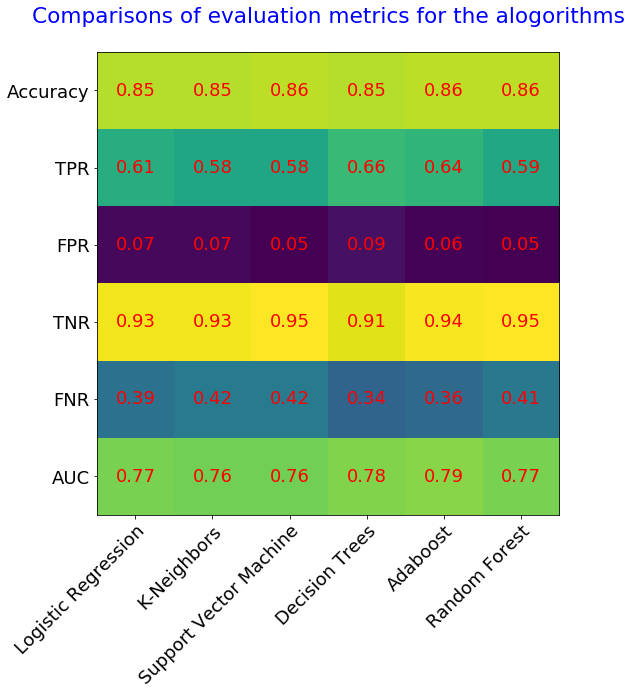

In [92]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
# sphinx_gallery_thumbnail_number = 2
mpl.rcParams["font.size"] = 18

metrices = ["Accuracy", "TPR", "FPR", "TNR",
              "FNR", "AUC"]
algorithms= ["Logistic Regression", "K-Neighbors", "Support Vector Machine",
           "Decision Trees", "Adaboost", "Random Forest"]


con_accuracy=np.array(hold_accuracy)
con_TPR=np.array(hold_TPR)
con_FPR=np.array(hold_FPR)
con_TNR=np.array(hold_TNR)
con_FNR=np.array(hold_FNR)
con_AUC=np.array(hold_AUC)
harvest = np.zeros(shape=(6,6))
harvest[0]=hold_accuracy
harvest[1]=hold_TPR
harvest[2]=hold_FPR
harvest[3]=hold_TNR
harvest[4]=hold_FNR
harvest[5]=hold_AUC

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(algorithms)))
ax.set_yticks(np.arange(len(metrices)))
# ... and label them with the respective list entries
ax.set_xticklabels(algorithms)
ax.set_yticklabels(metrices)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(metrices)):
    for j in range(len(algorithms)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="r")

ax.set_title("Comparisons of evaluation metrics for the alogorithms\n",color='b')
fig.tight_layout()
plt.show()

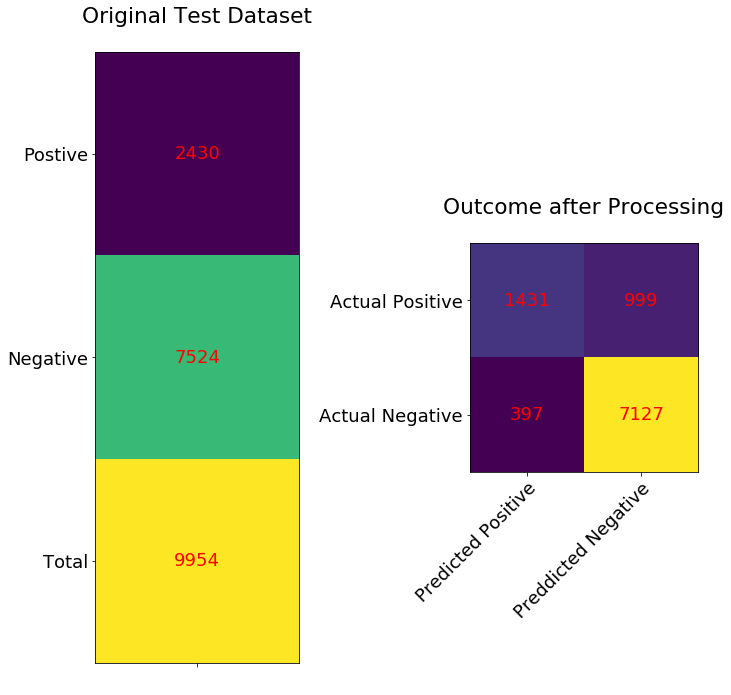

In [115]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams["font.size"] = 18

#numbers=np.array([[2,430,7,524]])
xx=['Positive','Negative','Total']
yy=["Total"]

yy=['Postive','Negative','Total']
xx=[" "]
numbers=np.array([[2430],[7524],[9954]])
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8, 4)
im = ax1.imshow(numbers)
mpl.rcParams["font.size"] = 12
# We want to show all ticks...
ax1.set_xticks(np.arange(len(xx)))
ax1.set_yticks(np.arange(len(yy)))
# ... and label them with the respective list entries
ax1.set_xticklabels(xx)
ax1.set_yticklabels(yy)

# Rotate the tick labels and set their alignment.
#plt.setp(ax1.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_xticklabels(),  ha="right", rotation_mode="anchor")
mpl.rcParams["font.size"] = 18
# Loop over data dimensions and create text annotations.
# Loop over data dimensions and create text annotations.
for i in range(len(yy)):
    for j in range(len(xx)):
        text = ax1.text(j, i, numbers[i, j],
                       ha="center", va="center", color="r")


ax1.set_title("Original Test Dataset\n")

# try next one
numbers=np.array([[1431,999],[397,7127]])

xx=['Predicted Positive','Preddicted Negative']
yy=["Actual Positive","Actual Negative"]
fig.set_size_inches(10, 10)
im = ax2.imshow(numbers)

# We want to show all ticks...
ax2.set_xticks(np.arange(len(xx)))
ax2.set_yticks(np.arange(len(yy)))
# ... and label them with the respective list entries
ax2.set_xticklabels(xx)
ax2.set_yticklabels(yy)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# Loop over data dimensions and create text annotations.
for i in range(len(yy)):
    for j in range(len(xx)):
        text = ax2.text(j, i, numbers[i, j],
                       ha="center", va="center", color="r")


ax2.set_title("Outcome after Processing\n")


fig.tight_layout()
plt.show()
